# Reading data files from the web

## Using NumPy `DataSource`

This makes a local copy and won't download again if it already has the data.

In [1]:
import numpy as np

ds = np.DataSource('../data')  # <- Local target.

url = 'https://geocomp.s3.amazonaws.com/data/F3_horizon.npy'
horizon = np.load(ds.open(url, mode='rb'))

horizon[:5, :5]

array([[0.85877109, 0.85878152, 0.85878676, 0.85877627, 0.85877109],
       [0.85876209, 0.85877776, 0.85878301, 0.85877252, 0.85877252],
       [0.85875702, 0.85876751, 0.85879368, 0.85875702, 0.85876751],
       [0.85873199, 0.85875815, 0.85875815, 0.85874242, 0.85875815],
       [0.85873681, 0.85873157, 0.85886252, 0.85869491, 0.85874206]])

We can use this tool with any data, it doesn't have to be a NumPy file. E.g. let's make a PIL `Image` object from a file on the web. (To install PIL, `pip install Pillow`.)

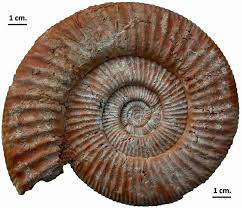

In [3]:
from PIL import Image

url = 'https://geocomp.s3.amazonaws.com/data/Random_ammonite.jpeg'
img = Image.open(ds.open(url, mode='rb'))

img

## Using `pandas`

Pandas reads files from URLs or local file paths equally well:

In [6]:
import pandas as pd

url = 'https://geocomp.s3.amazonaws.com/data/RPC_4_lithologies.csv'
df = pd.read_csv(url)

df.head()

,RPC,Description,Lithology,Vp,Vs,Rho,Rho_n
0,104818,KIAMICHI FORMA. 4,sandstone,3045.6,1595.7,2108.0,2109.120585
1,104893,KIAMICHI REMOLD 3,sandstone,3000.6,1517.1,2126.0,2090.342013
2,104652,NAVAJO ARCO 2,sandstone,3363.6,2041.5,2162.0,2131.989982
3,104752,NAVAJO ARCO REMOL 1,sandstone,3195.3,1606.2,2160.0,2184.939233
4,104598,FERRON 82-3 1677.5,sandstone,4237.5,2448.6,2428.0,2472.230768


## Using `lasio` or `welly`

These tools read from the web in the same way as `pandas`:

In [10]:
import welly

url = 'https://geocomp.s3.amazonaws.com/data/P-129.LAS'
w = welly.Well.from_las(url)

w

/home/matt/miniconda3/envs/py39/lib/python3.9/site-packages/welly/well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


Well(uwi: 'Long = 63* 45'24.460  W', 24 curves: ['CALI', 'HCAL', 'PEF', 'DT', 'DTS', 'DPHI_SAN', 'DPHI_LIM', 'DPHI_DOL', 'NPHI_SAN', 'NPHI_LIM', 'NPHI_DOL', 'RLA5', 'RLA3', 'RLA4', 'RLA1', 'RLA2', 'RXOZ', 'RXO_HRLT', 'RT_HRLT', 'RM_HRLT', 'DRHO', 'RHOB', 'GR', 'SP'])

## Using `urllib`

This built-in library returns a file handle.

We'll make a PIL `Image` object from a file on the web. (To install PIL, `pip install Pillow`.)

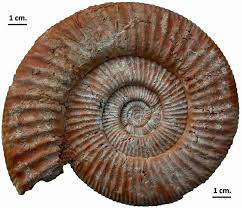

In [18]:
import urllib
from PIL import Image

url = 'https://geocomp.s3.amazonaws.com/data/Random_ammonite.jpeg'
img = Image.open(urllib.request.urlopen(url))

img

## Using `requests`

To get this library, `pip install requests`

In [25]:
import requests

url = 'https://geocomp.s3.amazonaws.com/data/RPC_simple.csv'

r = requests.get(url)
r.text[:100]

'Vp,Vs,rho,Lithology\n3045.6,1595.7,2.1091205853328656,sandstone\n3000.6,1517.1,2.0903420131307504,sand'

If you need a file-like, you can do this sort of thing:

In [28]:
from io import StringIO

url = 'https://geocomp.s3.amazonaws.com/data/RPC_simple.csv'

r = requests.get(url)
np.genfromtxt(StringIO(r.text), delimiter=',', skip_header=1, )

array([[3.04560000e+03, 1.59570000e+03, 2.10912059e+00,            nan],
       [3.00060000e+03, 1.51710000e+03, 2.09034201e+00,            nan],
       [3.36360000e+03, 2.04150000e+03, 2.13198998e+00,            nan],
       ...,
       [5.09242916e+03, 2.84552550e+03, 2.66721691e+00,            nan],
       [3.32464337e+03, 1.66765261e+03, 2.57005270e+00,            nan],
       [5.07709503e+03, 2.78727889e+03, 2.52150149e+00,            nan]])

`r.content` holds the bytes (e.g. for an image):

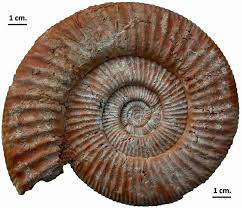

In [26]:
from io import BytesIO

url = 'https://geocomp.s3.amazonaws.com/data/Random_ammonite.jpeg'

r = requests.get(url)

Image.open(BytesIO(r.content))

To send data, use `requests.get(url, params={'my_query': 1000})` for example.

To make a POST request, use `requests.post`, etc.

---

&copy; 2021 AgileScientific.com